# **1. Предварительная загрузка данных и модулей**

In [32]:
import pandas as pd
import numpy as np
from pandas import read_csv

**1.1_Загрузка_данных**

In [33]:
# 1.1.1 Исходный данные без очистки.

In [40]:
df_1=read_csv('D:\_ДАННЫЕ\Train_full_dropduplicate.csv')

In [41]:
df_1=df_1.filter(regex='^(?!.*Unnamed).*$')

In [42]:
df_1.head(3)

,Пол,Семейное_положение,Возраст,Высшее_образование,Профессия,Опыт_работы,Уровень_расходов,Размер_семьи,Анонимная_категория,Целевая_категория
0,1,0.0,18,0.0,5.0,4.0,3,2.0,6.0,1
1,1,1.0,18,0.0,7.0,0.0,1,4.0,6.0,1
2,0,0.0,19,0.0,8.0,1.0,3,3.0,4.0,1


In [43]:
df_1.Целевая_категория.value_counts()

4    2039
1    1902
2    1794
3    1793
Name: Целевая_категория, dtype: int64

In [6]:
# 1.1.2 Данные с заполнением NaN соседними данными после группировки (fillna) без удаления строк.

In [7]:
df_2=read_csv('D:\_ДАННЫЕ\Train_cleared_fillna.csv')

In [8]:
df_2=df_2.filter(regex='^(?!.*Unnamed).*$')

In [9]:
df_2.shape

(8067, 10)

In [21]:
df_2.Целевая_категория.value_counts()

4    2268
1    1971
3    1970
2    1858
Name: Целевая_категория, dtype: int64

In [10]:
# 1.1.3 Строки с NaN удаляются (dropna).

In [11]:
df_3=read_csv('D:\_ДАННЫЕ\Train_cleared_dropna.csv')

In [12]:
df_3=df_3.filter(regex='^(?!.*Unnamed).*$')

In [22]:
df_3.Целевая_категория.value_counts()

4    1757
3    1720
1    1616
2    1572
Name: Целевая_категория, dtype: int64

In [13]:
# 1.1.4 Удаляются строки с NaN (dropna) и дубликаты (dropduplicate).

In [14]:
df_4=read_csv('D:\_ДАННЫЕ\Train_cleared_dropna_drop_duplicates.csv')

In [15]:
df_4=df_4.filter(regex='^(?!.*Unnamed).*$')

In [23]:
df_4.Целевая_категория.value_counts()

1    1519
4    1505
2    1489
3    1454
Name: Целевая_категория, dtype: int64

In [60]:
# 1.1.5 Удаляются строки с NaN (dropna), дубликаты (dropduplicate) и противоречивые данные.

In [16]:
df_5=read_csv('D:\_ДАННЫЕ\Train_cleared_!!!!!!!!.csv')

In [17]:
df_5=df_5.filter(regex='^(?!.*Unnamed).*$')

In [24]:
df_5.Целевая_категория.value_counts()

4    1477
1    1468
2    1407
3    1375
Name: Целевая_категория, dtype: int64

In [100]:
# 1.1.6 Загружаем новых клиентов.

In [101]:
df_test=read_csv('D:\_ДАННЫЕ\Test_CLEARED_END!!!!!!!!.csv')

In [102]:
df_test=df_test.filter(regex='^(?!.*Unnamed).*$')

In [66]:
==========================================================================================

SyntaxError: invalid syntax (Temp/ipykernel_17120/3267711636.py, line 1)

In [103]:
df_OOO=read_csv('D:\_ДАННЫЕ\Test_FILLNA_DROP_ALL_DUPLICATE.csv')

In [104]:
df_OOO=df_OOO.filter(regex='^(?!.*Unnamed).*$')

In [105]:
df_OOO.shape

(7150, 10)

In [ ]:
==========================================================================================

In [131]:
def to_array(x):
    array = x.values
    X = array[:,0:9]
    Y = array[:,9]
    return [X,Y]


In [132]:
X_new_clients = to_array(df_test)[0]
Y_new_clients = to_array(df_test)[1]

**1.2_Загрузка_SelectKBest**

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

**1.3_Загрузка_KNN**

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=7) 

NameError: name 'X' is not defined

In [ ]:
#model=KNeighborsClassifier()

In [ ]:
#model.fit(X_train,Y_train)

In [ ]:
#result=model.score(X_test,Y_test)
#results

**1.4_Загрузка_графической_части**

# **2. Готовим списки**

In [135]:
lst_1 = list(range(2,10))
lst_2 = [df_1, df_2, df_3, df_4, df_5]
res_test = []
res_new_clients = []

In [136]:
def to_array(x):
    array = x.values
    X = array[:,0:9]
    Y = array[:,9]
    return [X,Y]


In [137]:
#model=AdaBoostClassifier()
#model=LogisticRegression()
#model = DecisionTreeClassifier()
model = RandomForestClassifier()#max_depth=7, min_samples_leaf=3, n_estimators=60)

for i in lst_2:
    sign = to_array(i)[0]
    meaning = to_array(i)[1]
    X_train, X_test, Y_train, Y_test = train_test_split(sign, meaning, test_size=0.25, shuffle=True, random_state=7)
    model.fit(X_train,Y_train)
    result=model.score(X_test,Y_test)
    res_test.append(result)
res_test

[0.4495217853347503,
 0.49727317798710957,
 0.4913017396520696,
 0.4517426273458445,
 0.473463687150838]

In [29]:
#model=AdaBoostClassifier()
#model=LogisticRegression()
#model = DecisionTreeClassifier()
model = RandomForestClassifier(max_depth=7, min_samples_leaf=3, n_estimators=60)

for i in lst_2:
    sign = to_array(i)[0]
    meaning = to_array(i)[1]
#    X_train, X_test, Y_train, Y_test = train_test_split(sign, meaning, test_size=0.25, shuffle=True, random_state=7)
    model.fit(sign,meaning)
    result=model.score(X_new_clients,Y_new_clients)
    res_new_clients.append(result)
res_new_clients

[0.3312007874015748,
 0.3346456692913386,
 0.3346456692913386,
 0.327755905511811,
 0.33070866141732286]

In [30]:
==================================================================

SyntaxError: invalid syntax (Temp/ipykernel_17120/806859770.py, line 1)

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
x = 1,2,3,4,5

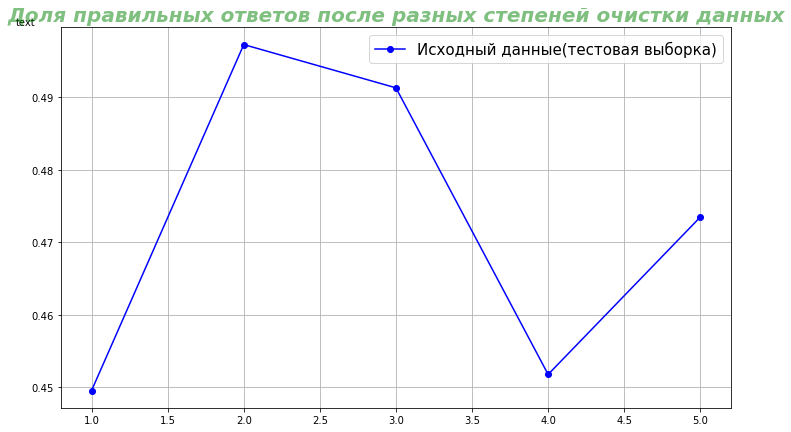

In [140]:
plt.figure(figsize=(12, 7))

plt.title('Доля правильных ответов после разных степеней очистки данных', alpha=0.5, color='g', fontsize=20, fontstyle='italic',
fontweight='extra bold', linespacing=10)

line1, = plt.plot(x, res_test, 'o-b',label='Исходный данные(тестовая выборка)')
#line2, = plt.plot(x, res_new_clients, 'o-.m', label='Новые клиенты')
plt.text(0.5, 0.5, 'text')
plt.grid()
plt.legend(fontsize=15)
plt.show()

In [ ]:
========================================================================================================

In [138]:
df_1.head(2)

,Пол,Семейное_положение,Возраст,Высшее_образование,Профессия,Опыт_работы,Уровень_расходов,Размер_семьи,Анонимная_категория,Целевая_категория
0,1,0.0,18,0.0,5.0,4.0,3,2.0,6.0,1
1,1,1.0,18,0.0,7.0,0.0,1,4.0,6.0,1


<AxesSubplot:>

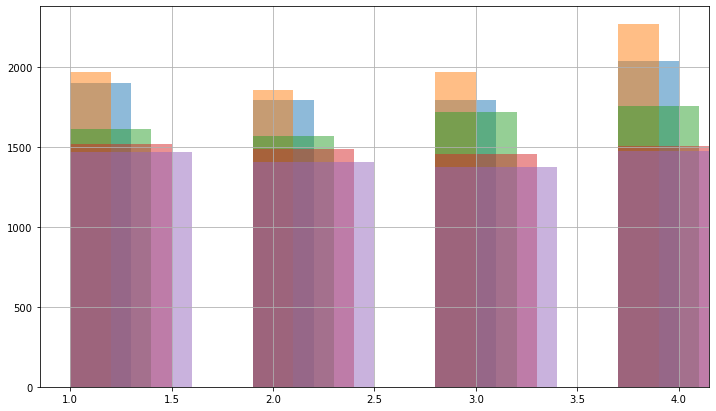

In [250]:
plt.figure(figsize=(12, 7))
df_1.Целевая_категория.hist(width = 0.3,alpha=0.5)
df_2.Целевая_категория.hist(width = 0.2,alpha=0.5)
df_3.Целевая_категория.hist(width = 0.4,alpha=0.5)
df_4.Целевая_категория.hist(width = 0.5,alpha=0.5)
df_5.Целевая_категория.hist(width = 0.6,alpha=0.5)


In [ ]:
==================================================================

In [79]:
def to_array(x):
    array = x.values
    X = array[:,0:9]
    Y = array[:,9]
    return [X,Y]

In [91]:
X = to_array(df_5)[0]
Y = to_array(df_5)[1]
model = DecisionTreeClassifier()
model.fit(X,Y)
#result=model.score(X,Y)
#result

DecisionTreeClassifier()

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
new_predictions = model.predict(X_new_clients)

In [94]:
print(classification_report(Y_new_clients, new_predictions))
print(confusion_matrix(Y_new_clients, new_predictions))

              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       692
         2.0       0.98      0.97      0.97       450
         3.0       0.97      0.96      0.97       381
         4.0       0.97      0.98      0.98       631

    accuracy                           0.98      2154
   macro avg       0.98      0.97      0.98      2154
weighted avg       0.98      0.98      0.98      2154

[[680   3   4   5]
 [  4 437   3   6]
 [  4   4 367   6]
 [  3   4   4 620]]


In [86]:
kfold=KFold(n_splits=3,random_state=7,shuffle=True)
results=cross_val_score(model, X, Y, cv=3)
results.mean()

0.28729016786570744